# 다중분류
- Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [5]:
# X 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [7]:
# y 데이터는 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')                      # 노드수는 Y의 의 종류(N)의 수, 활성화 함수는 soft max
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 다중분류시 손실 함수는 categorical_crossentropy
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(X_train, Y_train, validation_split=0.2, 
                            epochs=100, batch_size=100)

Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 1s 12ms/sample - loss: 1.9095 - accuracy: 0.3186 - val_loss: 1.6898 - val_accuracy: 0.2414
Epoch 2/100
113/113 [==============================] - 0s 150us/sample - loss: 1.7999 - accuracy: 0.3274 - val_loss: 1.5986 - val_accuracy: 0.2414
Epoch 3/100
113/113 [==============================] - 0s 186us/sample - loss: 1.7001 - accuracy: 0.3363 - val_loss: 1.5158 - val_accuracy: 0.2414
Epoch 4/100
113/113 [==============================] - 0s 257us/sample - loss: 1.6108 - accuracy: 0.3363 - val_loss: 1.4396 - val_accuracy: 0.2759
Epoch 5/100
113/113 [==============================] - 0s 274us/sample - loss: 1.5274 - accuracy: 0.3363 - val_loss: 1.3706 - val_accuracy: 0.3103
Epoch 6/100
113/113 [==============================] - 0s 256us/sample - loss: 1.4495 - accuracy: 0.3628 - val_loss: 1.3057 - val_accuracy: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 221us/sample - l

In [13]:
 model.evaluate(X_test, Y_test)

36/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.11983568304114872, 0.9722222]

- 학습과정 시각화

In [14]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

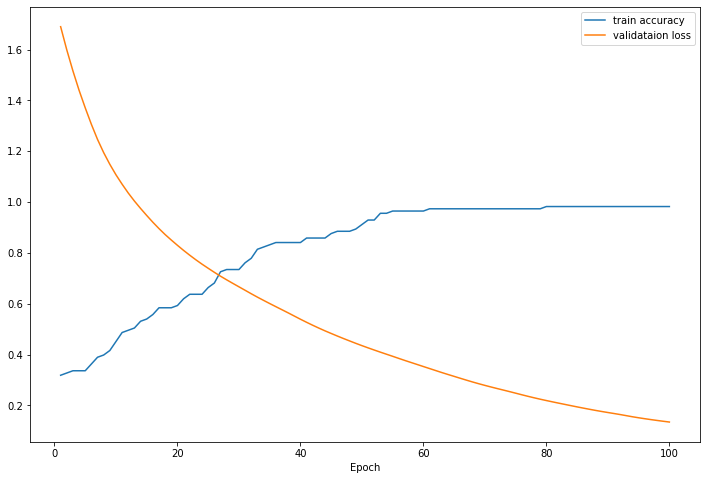

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend()
plt.xlabel('Epoch')
plt.show()

- Epoch 횟수를 더 늘려서 학습을 해보자

In [30]:
model2 = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')                      # 노드수는 Y의 의 종류(N)의 수, 활성화 함수는 soft max
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 12)                372       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 39        
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [31]:
model2.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
hist2 = model2.fit(X_train, Y_train, validation_split=0.2, 
                            epochs=1000, batch_size=100, verbose=0)

In [33]:
model2.evaluate(X_test, Y_test)

36/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0007846774145339926, 1.0]

In [34]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

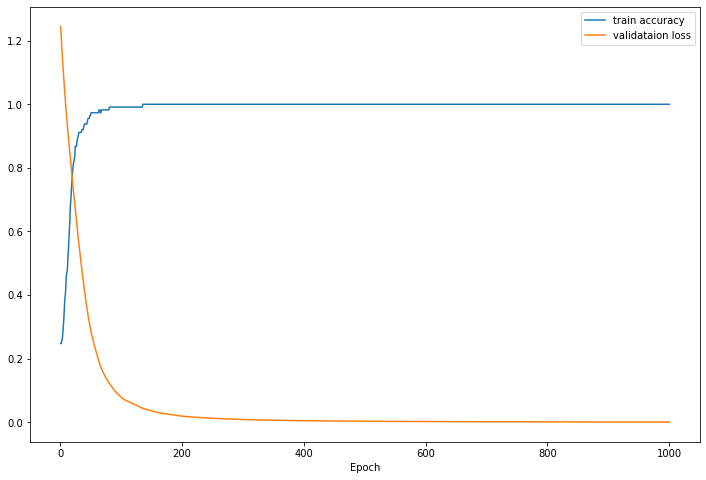

In [35]:
plt.figure(figsize=(12, 8))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validataion loss')
plt.legend()
plt.xlabel('Epoch')
plt.show()

- 모델 저장 및 로드

In [38]:
model2.save("wine.h5py")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: wine.h5py\assets


In [40]:
from tensorflow.keras.models import load_model
my_model = load_model("wine.h5py")

In [41]:
my_model.evaluate(X_test, Y_test)

36/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0007846684861255602, 1.0]

- 실제 데이터로 테스트

In [43]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [44]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
my_model.evaluate(wine_std[100].reshape(1, -1), Y[100].reshape(1, -1))

1/1 [==============================] - 0s 7ms/sample - loss: 2.0266e-06 - accuracy: 1.0000


[2.0265599687263602e-06, 1.0]